In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import traceback
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import gaussian_filter1d
from skfeature.function.similarity_based import fisher_score


In [24]:
data = pd.read_csv("microNIR_all_processed_size_order.csv")

print(data['species'].value_counts())
data=data.groupby('species',as_index = False,group_keys=False).apply(lambda s: s.sample(50,replace=False)) # make even category counts
print(data['species'].value_counts())



# # sort and reset row index     
data = data.sort_values(by=['classInt'])
data.reset_index(drop=True, inplace=True)

# select X and y 
X = data.values[:,4:].astype(float)
y = data['classInt'].to_numpy()

# wavelengths list
grouped = data.groupby('species')
average = grouped.mean(numeric_only=True)
wl = list(average.columns[2:].astype('float32'))


#sort and reset row index  
data = data.sort_values(by=['classInt'])
data.reset_index(drop=True, inplace=True)
datasmall3 = data.drop(data[data.classInt > 3].index)


# set up various bits for plotting
labels = data.label.unique()
classInt = data.classInt.unique()
sizegroup = data.groupby('classInt')
df2 = sizegroup.apply(lambda x: x['sizes'].unique().item())
sizes = df2.to_numpy()
font = {'fontname':'Calibri'}
colors = {'Anoplolepis': [0.12156863, 0.46666667, 0.70588235, 1], 'Camponotus': [1, 0.49803922, 0.05490196, 1], 'Carebara': [0.17254902, 0.62745098, 0.17254902, 1.], 'Colobopsis': [0.83921569, 0.15294118, 0.15686275, 1.], 
        'Creamatogaster': [0.58039216, 0.40392157, 0.74117647, 1], 'Oecophylla': [0.54901961, 0.3372549 , 0.29411765, 1], 'Pheidole':  [0.89019608, 0.46666667, 0.76078431, 1], 'Polyrhachis' :[0.49803922, 0.49803922, 0.49803922, 1], 'Tetramorium':  [0.7372549 , 0.74117647, 0.13333333, 1]}

# data.to_csv(r"C:\Users\Rosco\OneDrive - James Cook University\Documents\Scripts\test.csv")



Anoplolepis       164
Tetramorium       153
Camponotus        151
Pheidole          150
Oecophylla        142
Creamatogaster    135
Colobopsis         50
Name: species, dtype: int64
Anoplolepis       50
Camponotus        50
Colobopsis        50
Creamatogaster    50
Oecophylla        50
Pheidole          50
Tetramorium       50
Name: species, dtype: int64


In [17]:
data

,species,label,classInt,sizes,908.1,914.294,920.489,926.683,932.877,939.072,...,1539.924,1546.119,1552.313,1558.507,1564.702,1570.896,1577.09,1583.285,1589.479,1595.673
0,Pheidole,Pheidole,1,3,-0.007976,-0.007209,-0.008402,-0.008143,-0.007499,-0.007406,...,-0.002540,-0.003024,-0.003503,-0.004008,-0.004584,-0.005088,-0.005614,-0.006112,-0.006594,-0.007095
1,Pheidole,Pheidole,1,3,-0.008793,-0.008033,-0.009004,-0.008406,-0.007312,-0.007284,...,-0.002549,-0.002979,-0.003398,-0.003874,-0.004396,-0.004864,-0.005426,-0.005863,-0.006290,-0.006818
2,Pheidole,Pheidole,1,3,0.000922,-0.000679,-0.002840,-0.004088,-0.004445,-0.005004,...,-0.001389,-0.001893,-0.002368,-0.002905,-0.003417,-0.003930,-0.004612,-0.005097,-0.005605,-0.006209
3,Pheidole,Pheidole,1,3,-0.004391,-0.004875,-0.006242,-0.006179,-0.005938,-0.006389,...,-0.002381,-0.002684,-0.003139,-0.003487,-0.003866,-0.004350,-0.004837,-0.005251,-0.005610,-0.006042
4,Pheidole,Pheidole,1,3,0.000297,0.000097,-0.002114,-0.002326,-0.002019,-0.002545,...,-0.001287,-0.001539,-0.001885,-0.002139,-0.002491,-0.002822,-0.003173,-0.003494,-0.003815,-0.004184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,Oecophylla,Oecophylla,7,9,0.010350,0.006823,0.003671,0.001330,-0.000570,-0.002189,...,0.002892,0.000915,-0.000898,-0.002745,-0.004493,-0.006094,-0.007814,-0.009418,-0.011065,-0.012677
346,Oecophylla,Oecophylla,7,9,0.007768,0.004614,0.002205,0.000340,-0.001807,-0.003156,...,0.004338,0.002073,-0.000092,-0.002356,-0.004490,-0.006559,-0.008568,-0.010559,-0.012599,-0.014539
347,Oecophylla,Oecophylla,7,9,0.019904,0.013640,0.009136,0.005183,0.001159,-0.001383,...,0.003987,0.001790,-0.000409,-0.002511,-0.004529,-0.006581,-0.008473,-0.010259,-0.012320,-0.014141
348,Oecophylla,Oecophylla,7,9,-0.004707,-0.006599,-0.007440,-0.008446,-0.008809,-0.009029,...,0.000020,-0.001450,-0.002847,-0.004317,-0.005650,-0.006964,-0.008257,-0.009476,-0.010678,-0.011929


SPECTRA PLOT

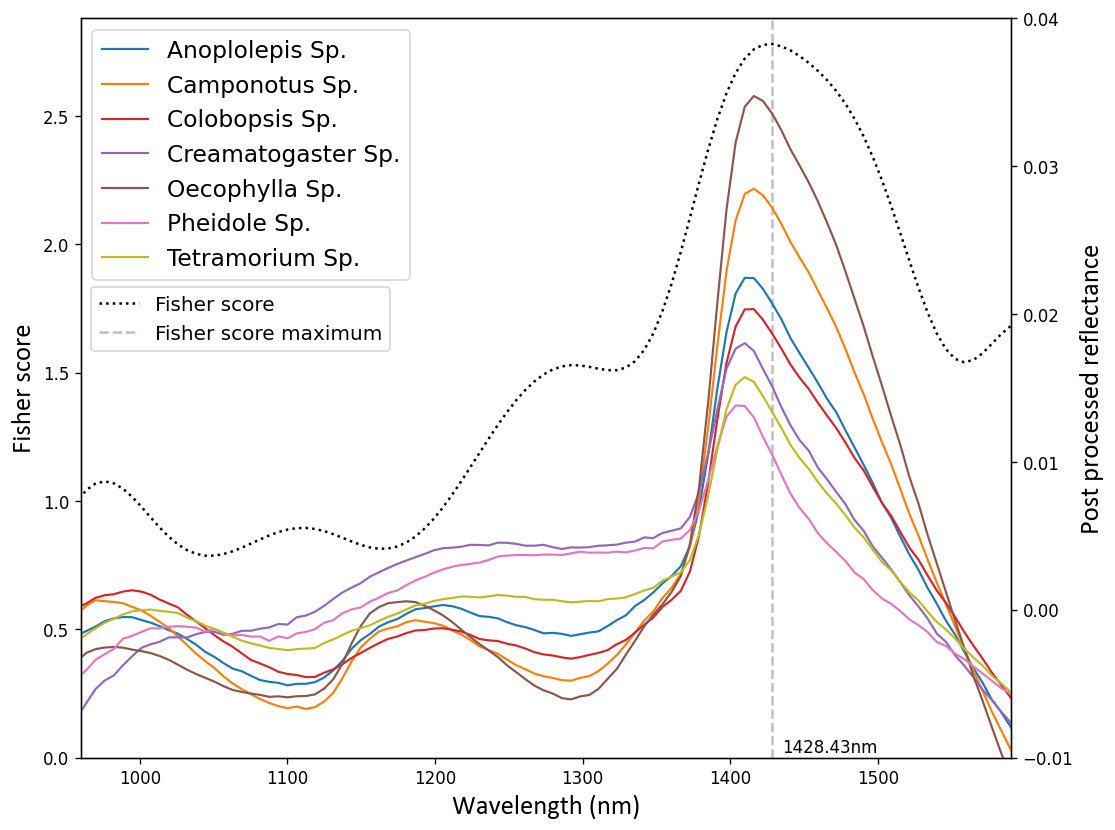

In [18]:
fig = plt.figure(dpi=120, figsize=(10,8))
plt.gcf().set_dpi(120)
plt.style.use('default')

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()


fish = fisher_score.fisher_score(X, y) #returns rank directly instead of fisher score. so no need for feature_ranking
fishsmoothed = gaussian_filter1d(fish, sigma=5)
curve= ax1.plot(wl, fishsmoothed, linestyle='dotted', c='black')
ax1.axvline(x = wl[np.argmax(fishsmoothed[:])], color = 'gray', alpha=0.5, linestyle='dashed')


i=0
legend = []
for index, row in average.iterrows():
    specie = data.loc[data['species'] == index, 'species'].iloc[0]
    legend.append(specie+" Sp.")
    spectra = average.loc[index].to_numpy()
    ax2.plot(wl, (spectra[2:]), color=colors[specie], linewidth=1.3)
    i = i+1

ax1.legend(['Fisher score', 'Fisher score maximum'], loc='upper left', bbox_to_anchor=(0, 0.65), prop= {"size":12})
ax2.legend(legend, loc='best', ncols=1,  prop = { "size": 14 })
ax1.set_ylim([0,np.max(fishsmoothed[:])+0.1])
ax2.set_ylim([-0.01,0.04])

ax2.set_xlim([960,1590])
# ax2.set_ylim([1.3,1.7])
ax1.annotate("%.2fnm" % wl[np.argmax(fishsmoothed[:])], xy=[1435,0.02])
ax1.set_xlabel("Wavelength (nm)",  **font, fontsize=16)
ax1.set_ylabel("Fisher score",  **font, fontsize=16)
ax2.set_ylabel("Post processed reflectance",  **font, fontsize=16)

plt.savefig('spectrafisher')
plt.show()

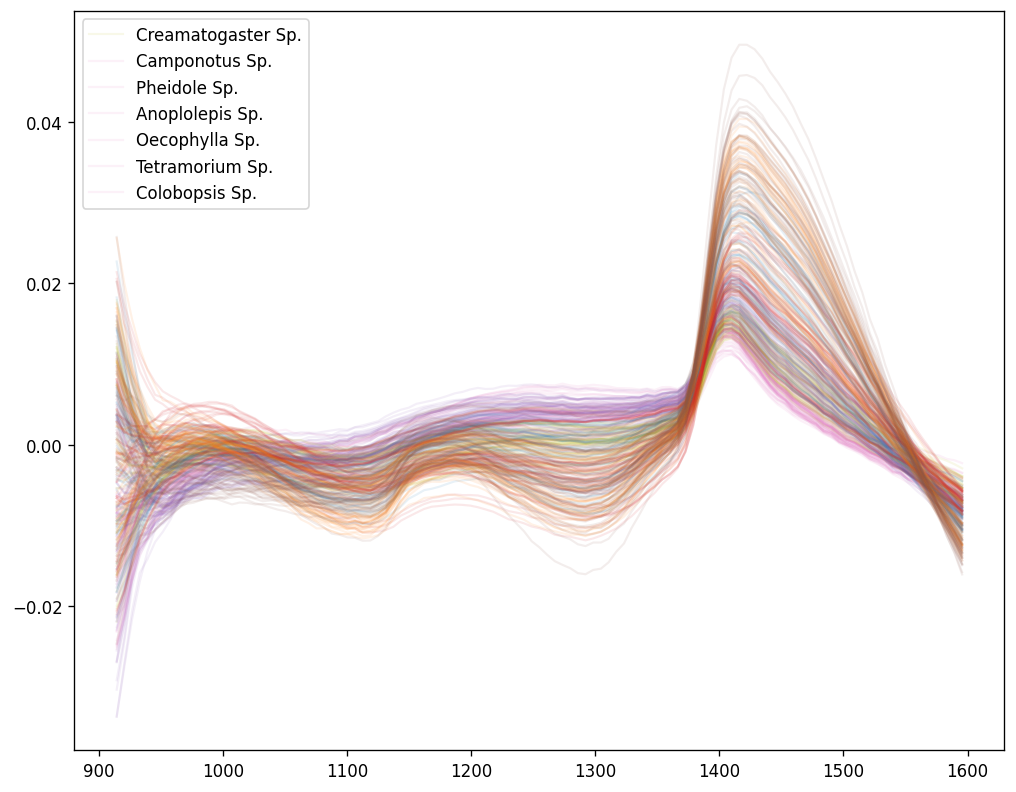

In [13]:
fig = plt.figure(dpi=120, figsize=(10,8))
plt.gcf().set_dpi(120)
plt.style.use('default')

grouped = data.groupby('species')
average = grouped.mean(numeric_only=True)
wl = list(data.columns[5:].astype('float32'))



legend = set([])
for index, row in data.iterrows():
    specie = row['species']
    i = row['classInt']
    legend.add(specie+" Sp.")
    plt.plot(wl, (row[5:]), color=colors[specie], linewidth=1.3, alpha=0.1)

legend = list(legend)

plt.legend(legend)
plt.show()

PCA

C:\Users\Rosco\AppData\Local\Temp\ipykernel_39556\3694105078.py:40: MatplotlibDeprecationWarning:

The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.



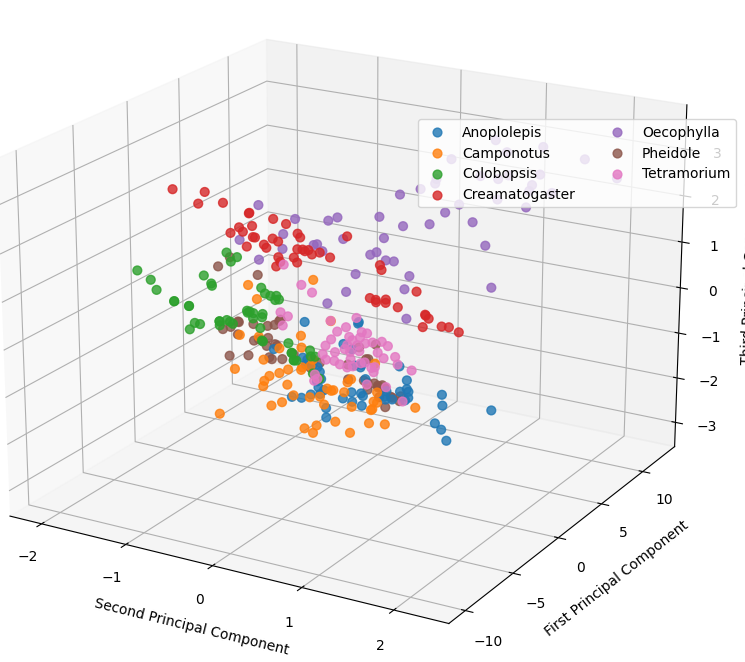

In [22]:
# %matplotlib widget
X = data.values[:,4:].astype(float)

scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

pca = PCA(n_components=5)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

# ex_variance=np.var(X_pca,axis=0)
# ex_variance_ratio = ex_variance/np.sum(ex_variance)
# ex_variance_ratio

Xax = X_pca[:,4]
Yax = X_pca[:,1]
Zax = X_pca[:,3]


fig = plt.figure(figsize=(8,8))
plt.gcf().set_dpi(100)
plt.style.use('default')
ax = fig.add_subplot(111, projection='3d')

for l in np.unique(data['species']):
 ix=np.where(data['species']==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], s=40, label=l, alpha=0.8)
# for loop ends
ax.set_xlabel("Second Principal Component", fontsize=10)
ax.set_ylabel("First Principal Component", fontsize=10)
ax.set_zlabel("Third Principal Component", fontsize=10)
# ax.axes.set_xlim3d(left=-60, right=80) 
# ax.axes.set_ylim3d(bottom=-10, top=80) 
# ax.axes.set_zlim3d(bottom=-35, top=20) 

# ax.zlim([])
ax.legend(loc='right', ncols=2, bbox_to_anchor=(1.15, 0.75), ncol=1)
ax.elev = 20   # x rotation (default=0)
ax.dist = 8
# plt.tight_layout()
# plt.savefig('PCABruker',dpi=fig.dpi)
plt.show()

PCA CUMULATIVE VARIANCE 

In [15]:
pca = PCA()
pca.fit(X)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)


fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)
fig.update_layout(xaxis_range=[1,10], height = 400, width = 700)


INTERACTIVE PCA

In [8]:
X = data.values[:,4:].astype(float)



fig = plt.figure(figsize=(8,10))

pca = PCA(n_components=5)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=1, y=2, z=3, color=data['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=800, size=data['sizes']
)
fig.show()

<Figure size 800x1000 with 0 Axes>

LDA LOOCV

In [19]:
lda = LDA(n_components=3)
conf_matrix = pd.DataFrame(columns=list(range(1,1+len(labels))), index=list(range(1,1+len(labels))))
conf_matrix.loc[:,:] = 0

for index, row in data.iterrows():
    
        traindata = data.drop(index, axis=0)
        ytest = row['classInt']
        ytrain = traindata['classInt']
        Xtest = row.values[3:].astype(float)
        Xtrain = traindata.values[:,3:].astype(float)

        lda.fit_transform(Xtrain, ytrain)
        ypred = lda.predict(Xtest.reshape(1, -1))

        conf_matrix.at[ypred[0], ytest] = conf_matrix.at[ypred[0], ytest] +1

        # print("species = "+ str(ytest) + ", pred =" + str(ypred[0]))


conf_matrix


,1,2,3,4,5,6,7
1,50,0,0,0,0,0,0
2,0,46,1,1,0,0,0
3,0,3,49,0,0,0,0
4,0,1,0,49,0,0,0
5,0,0,0,0,50,0,0
6,0,0,0,0,0,50,0
7,0,0,0,0,0,0,50


HEIRARCHICAL LDA LOOCV

In [27]:
lda = LDA(n_components=3)
conf_matrix_H = pd.DataFrame(columns=list(range(1,1+len(labels))), index=list(range(1,1+len(labels))))
conf_matrix_H.loc[:,:] = 0

# print(conf_matrix_H)
# print("starting")
for index, row in data.iterrows():
    
        traindata = data.drop(index, axis=0)
        ytest = row['classInt']
        ytrain = traindata['classInt']
        Xtest = row.values[5:].astype(float)
        Xtrain = traindata.values[:,5:].astype(float)

        lda.fit_transform(Xtrain, ytrain) #main
        ypred = lda.predict(Xtest.reshape(1, -1))

        if ypred[0] in (1, 2, 3) :
                
                lda = LDA(n_components=2)

                try:
                        traindata = datasmall3.drop(index, axis=0)
                except:
                        traindata = datasmall3
                
                ytest = row['classInt']
                ytrain = traindata['classInt']
                Xtest = row.values[5:].astype(float)
                Xtrain = traindata.values[:,5:].astype(float)

                lda.fit_transform(Xtrain, ytrain) #mini
                ypred = lda.predict(Xtest.reshape(1, -1))

        else:

                conf_matrix_H.at[ypred[0], ytest] = conf_matrix_H.at[ypred[0], ytest] +1
                # print(str(ytest) + "," + str(ypred[0]))
                # print(conf_matrix_H)

# print(conf_matrix_H)
                

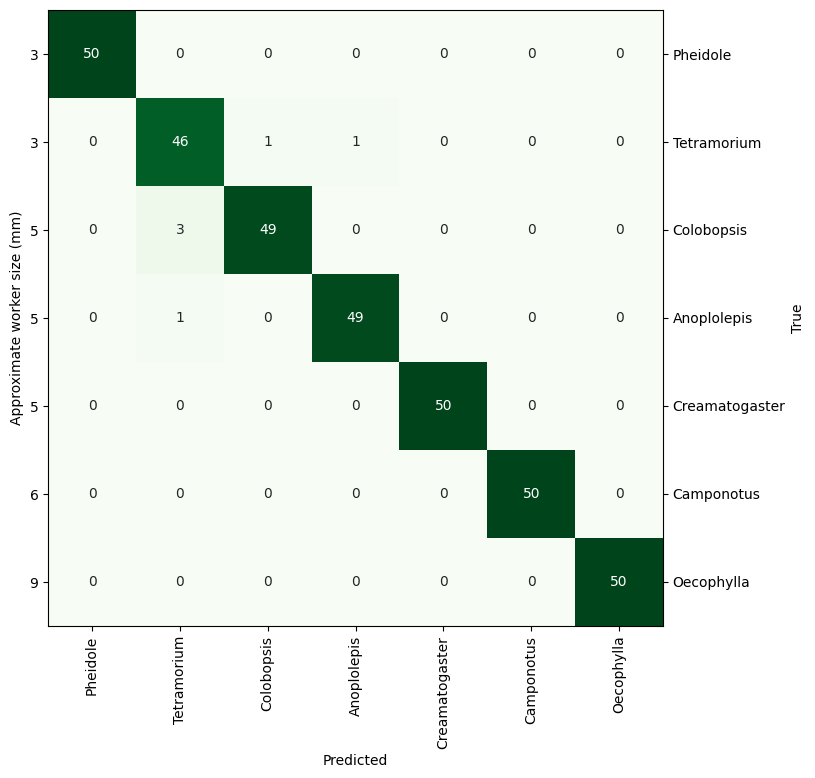

In [ ]:
fig = plt.figure(dpi=100, figsize=(11.6,8))
ax1 = fig.add_subplot(111)
ax1 = sns.heatmap(conf_matrix.to_numpy().astype(int), square=True, annot=True, fmt='d', cbar=False, cmap="Greens",
            xticklabels=labels, yticklabels=labels)
ticks = ax1.get_yticks()
ax2 = ax1.twinx()
ax2.set_yticks(ticks)
ax2.set_ylim([7 ,0])
ax1.set_xlabel("Predicted")
ax1.set_ylabel("True")
ax2.set_xlabel("3")
ax2.set_ylabel("Approximate worker size (mm)")
fig.subplots_adjust(left=0.37)
ax1.tick_params( labelright=True, labelbottom=True, labeltop=False, labelleft=False, labelrotation=0)
ax2.tick_params( labelright=False, labelbottom=False, labeltop=True, labelleft=True, labelrotation=0)
ax1.set_xticklabels((labels), rotation=90)
ax1.set_yticklabels(labels, rotation=00)
ax2.set_yticklabels(sizes, rotation=00)
ax1.xaxis.set_label_position('bottom')
ax1.yaxis.set_label_position('right')
ax2.xaxis.set_label_position('bottom')
ax2.yaxis.set_label_position('left')
# plt.savefig('matrxplot.png')
plt.show()

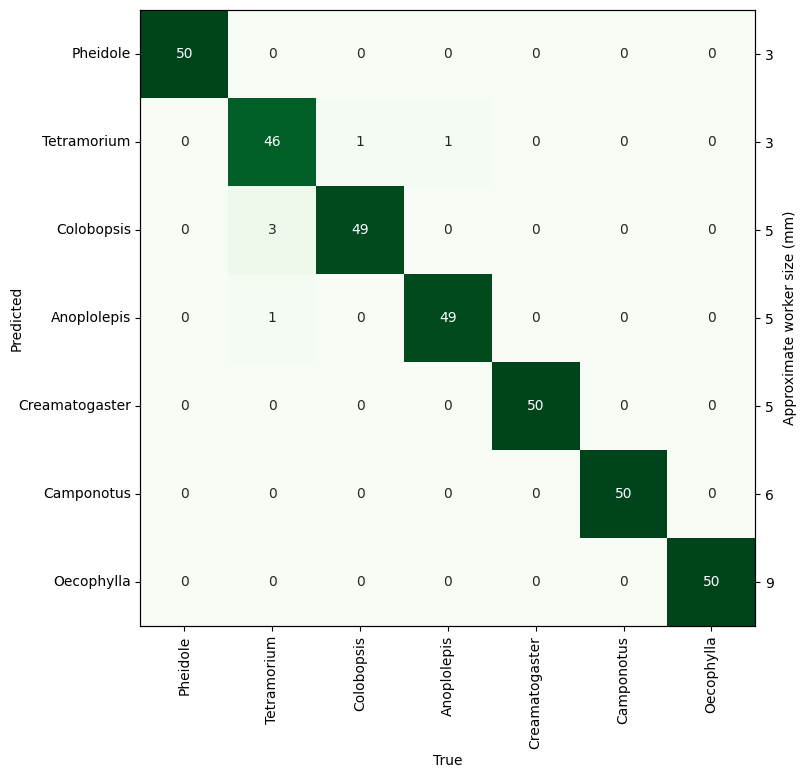

In [22]:
fig = plt.figure(dpi=100, figsize=(11.6,8))
ax1 = fig.add_subplot(111)
ax1 = sns.heatmap(conf_matrix.to_numpy().astype(int), square=True, annot=True, fmt='d', cbar=False, cmap="Greens",
            xticklabels=labels, yticklabels=labels)
ticks = ax1.get_yticks()
ax1.set_xlabel("True")

tempax = ax1.twinx()

ax2 = tempax.twiny()

ax2.set_yticks(ticks)
tempax.set_xticks(ticks)

ax2.set_ylim([7 ,0])

ax1.set_ylabel("XXX")
ax2.set_ylabel("XXX")
tempax.set_ylabel("Predicted", labelpad=-550)

ax1.set_ylabel("Approximate worker size (mm)", labelpad=20)
fig.subplots_adjust(left=0.37)
ax2.tick_params(top=False, labelright=True, labelbottom=False, labeltop=False, labelleft=False, labelrotation=0)
ax1.tick_params( labelright=False, labelbottom=True, labeltop=False, labelleft=True, labelrotation=0)
tempax.tick_params( labelright=True, labelbottom=False, labeltop=False, labelleft=False, labelrotation=0)

ax1.set_xticklabels((labels), rotation=90)
ax1.set_yticklabels(labels, rotation=00)
ax2.set_yticklabels(sizes, rotation=00)
ax1.xaxis.set_label_position('bottom')
ax1.yaxis.set_label_position('right')
ax2.xaxis.set_label_position('bottom')
ax2.yaxis.set_label_position('left')
plt.savefig('NIRmatrxplot.png')
plt.show()